<a href="https://colab.research.google.com/github/yesong98/Kaggle/blob/master/bike_sharing_demand_practice_for_aiffel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 자전거 대여 수요 예측 경진대회 탐색적 데이터 분석


## 1.1데이터둘러보기

In [98]:
import numpy as np
import pandas as pd # 판다스 임포트

#데이터 경로
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import numpy as np
import pandas as pd # 판다스 임포트

# 데이터 경로
data_path = '/content/drive/My Drive/ex2.2/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [100]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [101]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [102]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [103]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#atemp ? 

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 1.2 더 호과적인 분석을 위한 피처 엔지니어링

In [106]:
print(train['datetime'][100])#datetime 100번째 요소
print(train['datetime'][100].split())#공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0])#날짜
print(train['datetime'][100].split()[1])#시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [107]:
print(train['datetime'][100].split()[0])#날짜
print(train['datetime'][100].split()[0].split('-'))#"-"기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0])#연도
print(train['datetime'][100].split()[0].split('-')[1])#월
print(train['datetime'][100].split()[0].split('-')[2])#일

2011-01-05
['2011', '01', '05']
2011
01
05


In [108]:
print(train['datetime'][100].split()[1])#시간
print(train['datetime'][100].split()[1].split(':'))#":"기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(':')[0])#시간
print(train['datetime'][100].split()[1].split(':')[1])#분
print(train['datetime'][100].split()[1].split(':')[2])#초

09:00:00
['09', '00', '00']
09
00
00


In [109]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])#날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [110]:
from datetime import datetime #data(a?e?)time라이브러리 임포트
import calendar

print(train['date'][100])#날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))#datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) #정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])#문자열로 요일 반환
#strptime() 문자열을 날짜/시간으로 변환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [111]:
train['weekday'] = train['date'].apply(lambda dateString:
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])


In [112]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunder',
                                         4: 'Heavy Snow, Rain, Thunder'})

In [113]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 1.3데이터 시각화

In [114]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 분포도

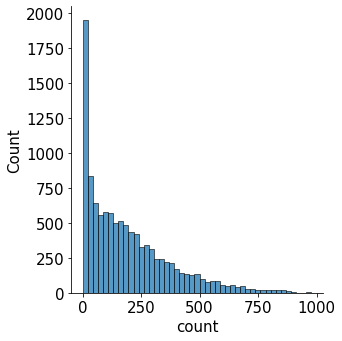

In [115]:
mpl.rc('font', size=15) # 폰트 크기를 15로 설정
sns.displot(train['count']); # 분포도 출력

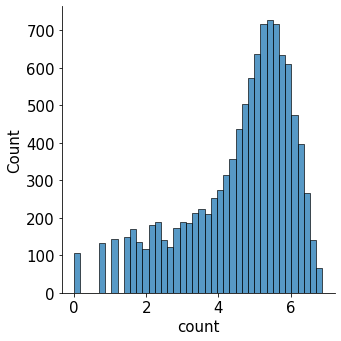

In [116]:
sns.displot(np.log(train['count']));

#### 막대 그래프

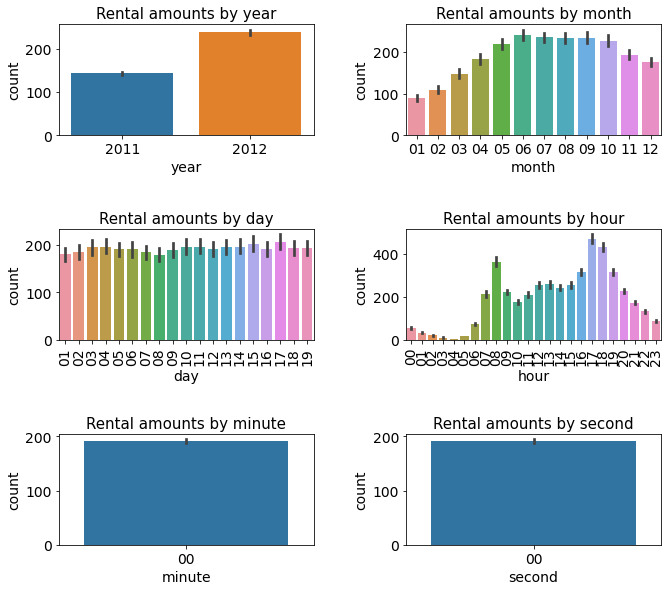

In [117]:
# 스텝1 : m행 n열 Figure준비
mpl.rc('font', size=14)
mpl.rc('axes',titlesize=15)#각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) #3행 2열 Figure 생성
plt.tight_layout()#그래프 사이에 여백 확보
figure.set_size_inches(10,9)# 전체 Figure 크기를 10x9인치로 설정

#스텝2: 각 축에 서브플롯 할당
#각 축에 연도, 연, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

#스텝 3: 세부 설정
#3-1: 서브플롯에 제목 달기
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

#3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

#### 박스플롯

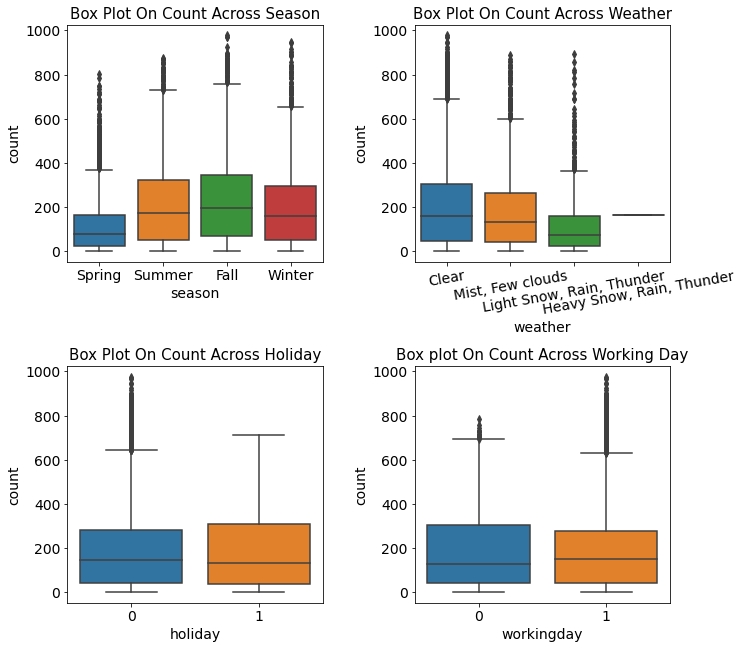

In [118]:
#스텝 1: m행, n열 Figure준비
figure, axes = plt.subplots(nrows=2, ncols=2)#2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

#스텝 2: 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

#스텝 3: 세부설정
#3-1: 서브플롯에 제목 달기
axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전


#### 포인트플롯

In [119]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


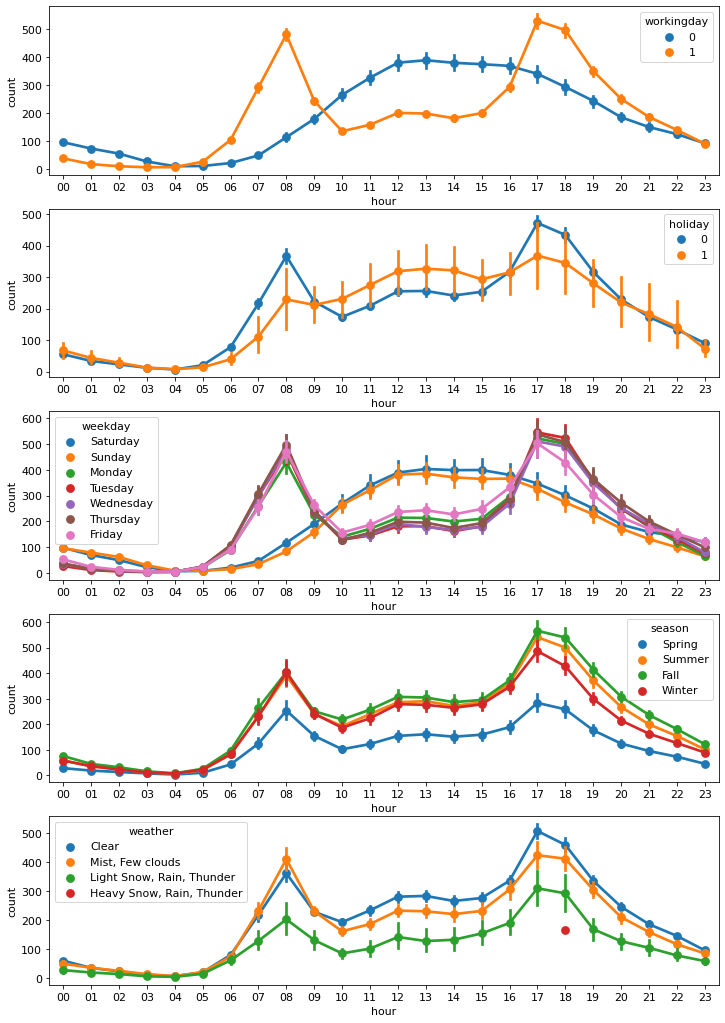

In [120]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

#### 회귀선을 포함한 산점도 그래프

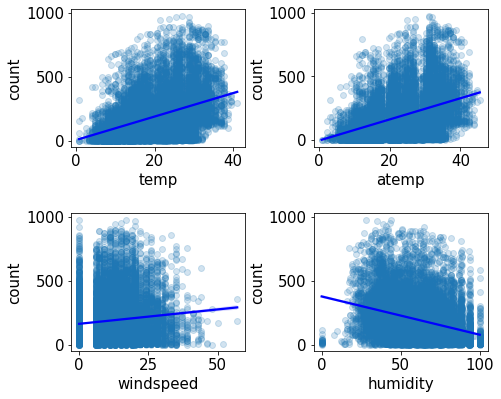

In [121]:
#스텝1: m행 n열 Figure 준비
mpl.rc('font',size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)#2행2열
plt.tight_layout()
figure.set_size_inches(7, 6)

#스텝2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도  별 대여 수량  산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});

#### 히트맵

In [122]:
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


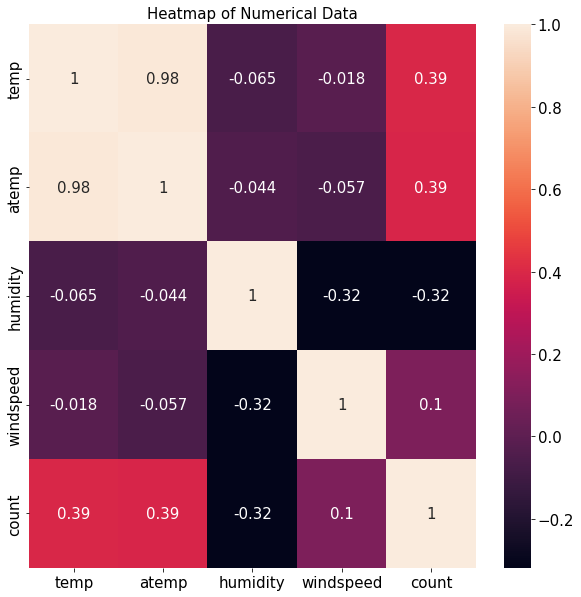

In [123]:
#피처 간 상관관계 매트릭스
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)#상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

# 2.자전거 대여 수요예측 경진대회 베이스라인 모델
메뉴: [Run] -> [Stop Session] 후 여기서부터 실행 권장.(필수아님)

In [124]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#데이터 경로
data_path = '/content/drive/My Drive/ex2.2/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 피쳐 엔지니어링
-> 변수에 로그를 취한 행동

-> 피쳐 엔지니어링은 주로 데이터의 숨겨진 특성을 발굴해내는 것을 목적으로 피쳐변수들을 가공하는 것을 의미(로그, 제곱, 일차변환, 정규화 등)

-> 변수 값이 0과 1사이에 분포하도록 조정해주거나, 변수가 평균이0이고 분산이 1이 되도록 조정하는 작업을 변수 정규화라고 하는데 이러한 작업도 피쳐 엔지니어링의 일부이다

-> 피쳐 엔지니어링은 데이터와 구현 환경조건이 주어진 상황에서 데이터 분석 업무를 수행할 때, 사용 가능한 통계모델이나 머신 러닝 모델은 몇가지로 사실상 정해져 있는 경우가 많다

#### 이상치 제거

In [125]:
#훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] !=4 ]

#### 데이터 합치기

In [126]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [127]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


#### 파생 변수(피처) 추가

In [128]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

#### 필요없는 피처 제거

In [129]:
drop_features = ['casual', 'registered', 'datetime','date', 'windspeed','month']

all_data = all_data.drop(drop_features, axis=1)

#### 데이터 나누기

In [130]:
#훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

#타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']#타깃값

In [131]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


## 2.2 평가지표 계산 함수 작성

In [132]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
  #지수변환 
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)

  #로그변환 후 결측값을 0으로 변환
  log_true = np.nan_to_num(np.log(y_true+1))
  log_pred = np.nan_to_num(np.log(y_pred+1))

  #RMSLE 계산
  output = np.sqrt(np.mean((log_true - log_pred)**2))

  return output

### RMSLE
오차를 구할 때 RMSE와는 log를 추가하는 점이 다르다.

1. 아웃라이어에 덜 민감하다. (robust) : 아웃라이어가 있더라도 값의 변동폭이 크지 않다.

2. 상대적 Error를 측정해준다. 

값의 절대적 크기가 커지면 RMSE의 값도 커지지만, RMSLE는 상대적 크기가 동일하다면 RMSLE의 값도 동일하다.

예측값 = 100, 실제값 = 90일 때, RMSLE = 0.1053, RMSE = 10. 

예측값 = 10,000, 실제값 = 9,000일 때, RMSLE = 0.1053, RMSE = 1,000

 RMSLE 그래프를 보면 예측값이 실제값보다 작을 경우 더 큰 패널티를 부여한다.


택시를 타고 이동한다고 가정했을 때
예측 소요 시간이 30분이라고 했으나 실제로 40분이 걸린다면 (예측값 < 실제값)
소비자가 더 분노하는 것과 비슷한 개념이다.

## 2.3 모델 훈련

In [133]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [134]:
log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

## 2.4모델성능검증

In [135]:
preds = linear_reg_model.predict(X_train)

In [136]:
print(f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0205


##2.5 예측 및 결과 제출

In [137]:
linearreg_preds = linear_reg_model.predict(X_test)#테스트 데이터로 예측
submission['count'] = np.exp(linearreg_preds) # 지수변환 
submission.to_csv('first_submission.csv', index=False)#파일로 저장

자, 여러분들이 여기까지 정상적으로 작성하셨다면 'Output/kaggle/working에 first_submission.csv이 생성되었을 겂니다
저 파일을 다운로드해서 직접 대회에 제출하고 평가점수를 살펴보세요

# 3. 자전거 대여 수요 예측 경진대회 모델 성능 개선

In [138]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#데이터 경로
data_path = '/content/drive/My Drive/ex2.2/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 피처 엔지니어링
#### 이상치 제거

In [139]:
#훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

#### 데이터 합치기

In [140]:
all_data = pd.concat([train, test],ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


#### 파생변수(피처)추가


In [141]:
from datetime import datetime

#날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x:x.split()[0])
#연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[0])
#월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[1])
#시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x:x.split()[1].split(':')[0])
#요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').weekday())

#### 필요없는 피처 제거

In [142]:
drop_features = ['casual','registered','datetime','date','windspeed','month']

all_data = all_data.drop(drop_features, axis=1)

#### 데이터 나누기

In [143]:
#훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

#타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y=train['count']#타깃값

## 평가지표 계산 함수 작성

In [144]:
import numpy as np
def rmsle(y_true, y_pred, convertExp=True) :
  #지수변환
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
  #로그변환 후 결측값을 0으로 변환
  log_true = np.nan_to_num(np.log(y_true+1))
  log_pred =np.nan_to_num(np.log(y_pred+1))

  #RMSLE계산
  output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

## 3.1 성능개선 1: 릿지 회구모델

#### 3.1.1하이퍼 파라미터 최적화(모델 훈련)


#### 모델 생성

In [145]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

#### 그리드서치 객체 생성

In [146]:
#하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

#교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
#그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, # 릿지모델
                                      param_grid=ridge_params, #값목록
                                      scoring=rmsle_scorer, #평가지표
                                      cv=5) # 교차검증 분할 수

#### 그리드서치 수행

In [147]:
log_y = np.log(y) #타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y)#훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [148]:
print('최적 하이퍼파라미터:', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터: {'alpha': 0.1, 'max_iter': 3000}


### 3.1.2 성능 검증


In [149]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

#평가
print(f'릿지 회귀 RMSLE 값: {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값: 1.0205


##3.2 성능 개선2: 라쏘 회귀모델
### 3.2.1 하이퍼 파라미터 최적화(모델 훈련)

In [150]:
from sklearn.linear_model import Lasso

#모델 생성
lasso_model = Lasso()
#하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params = {'max_iter':[3000], 'alpha': lasso_alpha}
#그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
#그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터:', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터: {'alpha': 0.00125, 'max_iter': 3000}


### 3.2.2성능검증

In [151]:
#예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

#평가
print(f'라쏘 회귀 RMSLE 값:{rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값:1.0205


## 3.3 성능개선 3: 랜덤 포레스트 회귀모델

####3.3.1 하이퍼 파라미터 최적화(모델 훈련)

In [152]:
from sklearn.ensemble import RandomForestRegressor

#모델 생성
randomforest_model = RandomForestRegressor()
#그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[10, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
#그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터:', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터: {'n_estimators': 140, 'random_state': 42}


### 3.3.3 예측 및 결과 제출

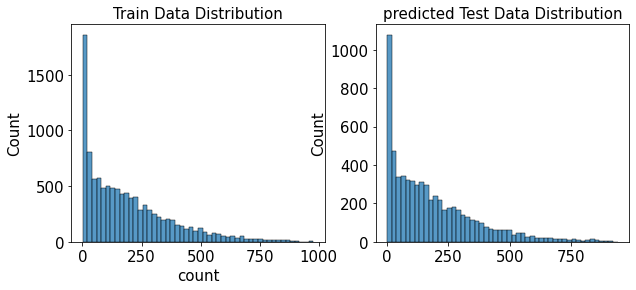

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10,4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('predicted Test Data Distribution');

In [154]:
submission['count'] = np.exp(randomforest_preds)#지수변환
submission.to_csv('second_submission.csv', index=False)

# 4. Challenge
점수를 확인하셨나요?

아마 점수가 높을겁니다. 하지만 높다고해서 순위권에 가깝다고 할 수 없습니다.

자, 이번주는 필사 후 여러분들이 스스로 Challenge를 하는것 입니다. 왜냐하면 다다음주에 1차 해커톤을 위함입니다.

다음은 당연한 Tip을 열거했습니다.

1. 성능향상을 위한 추가적인 EDA 고민
2. feature에 대한 분석, 생성, 제거작업 추가진행
3. 모델 종류에 대한 고민
4. 모델 최적화에 대한 고민